In [1]:
from base_functions import node, element_linear, element_nonlinear, system_from_mdpa

filename = "./Example_mdpas/E5.mdpa"
fix_mps = {
    "all": ["fixAll"],
    "x" : [],
    "y" : [],
    "z" : []
}

mp = {
    "claw": "StVenant",
    "YoungsModulus" : 10000000.0
}

s_l = system_from_mdpa(filename, fix_mps, material_parameters=mp, cross_area=0.01,linear_system=True)
s_nl = system_from_mdpa(filename, fix_mps, material_parameters=mp, cross_area=0.01,linear_system=False)

for s in [s_l, s_nl]:
    s.find_node(15,s.nodes).force[1] = -800

In [2]:
# solving nonlinear trusses
s_nl.solve_inverse_problem(tollerance=1e-9)

# solving linear trusses
s_l.solve_inverse_problem(tollerance=1e-9)

 >> starting to solve inverse problem
disp residual:  3.631378e-01   |   force residual:  8.000000e+02
disp residual:  4.200154e-02   |   force residual:  3.869985e+03
disp residual:  1.126152e-03   |   force residual:  7.847156e+01
disp residual:  5.208481e-07   |   force residual:  4.776974e-02
disp residual:  1.585496e-13   |   force residual:  1.190459e-08
disp residual:  2.330787e-15   |   force residual:  3.749514e-10
 >> inverse problem solved
 >> starting to solve inverse problem
disp residual:  3.767570e-01   |   force residual:  8.000000e+02
disp residual:  6.491700e-02   |   force residual:  7.800005e+03
disp residual:  1.016658e+00   |   force residual:  1.437364e+02
disp residual:  2.713855e-01   |   force residual:  5.759881e+04
disp residual:  6.215599e-01   |   force residual:  3.564428e+03
disp residual:  1.614451e-01   |   force residual:  2.796212e+04
disp residual:  1.743268e+00   |   force residual:  1.206299e+03
disp residual:  9.529842e-01   |   force residual:  

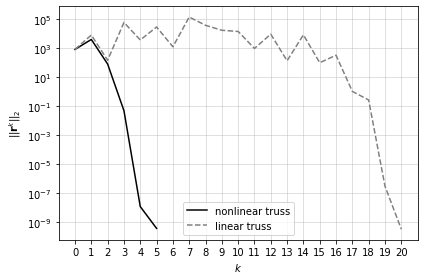

In [3]:
s_nl.plot_convergence(label_text="nonlinear truss")
s_l.plot_convergence(label_text="linear truss")
s_l.show_plot()
#s_nl.save_plot_pdf("convergence_plot")

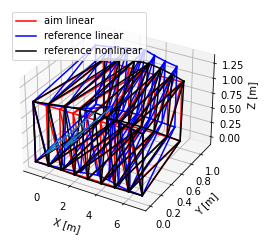

In [4]:
#%matplotlib qt 
fig, ax = s_l.create_plot_figures_3d()
plot_figures = {"fig":fig, "ax":ax}
s_l.plot(["aim","ref"], plot_figures)
s_nl.plot(["ref"], plot_figures)
s_l.show_plot()

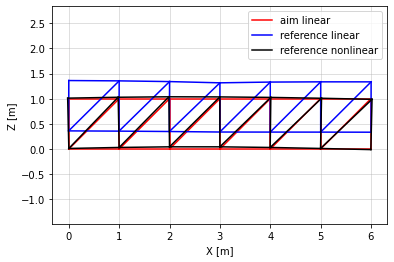

In [5]:
s_l.plot2d(["aim","ref"],scale_force=0.05,scale_arrow=0.5,print_lvl=1,proj="y")
s_nl.plot2d(["ref"],scale_force=0.05,scale_arrow=0.5,print_lvl=1,proj="y")
s_l.show_plot()
#s_l.save_plot_pdf("y1")